**Import Library**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns
import matplotlib.pyplot as plt

import re
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS
from nltk.stem import SnowballStemmer
from nltk.tokenize import RegexpTokenizer

import tensorflow as tf
from tensorflow.keras.preprocessing.text import one_hot, Tokenizer
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from tensorflow.keras.layers import Embedding, LSTM
from keras.layers.convolutional import Conv1D
from tensorflow.keras.layers import SpatialDropout1D
from keras.layers.convolutional import MaxPooling1D
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Tweets.csv")
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

In [ ]:
df.dtypes

tweet_id                          int64
airline_sentiment                object
airline_sentiment_confidence    float64
negativereason                   object
negativereason_confidence       float64
airline                          object
airline_sentiment_gold           object
name                             object
negativereason_gold              object
retweet_count                     int64
text                             object
tweet_coord                      object
tweet_created                    object
tweet_location                   object
user_timezone                    object
dtype: object

**Penjelasan dari setiap field - field dataset Twitter US Airline**


1. tweet_id = id unik yang diberikan oleh twitter untuk tiap dataset
2. airline sentiment = adalah perasaan pengguna twitter terhadap maskapai
3. airline_sentiment_conf = adalah tingkat kepercayaan terhadap perasaan yang diungkapkan
4. negativereason = atau alasan negatif 
5. negativereason_conf = adalah tingkat kepercayaan pada alasan negatif yang diungkapkan
6. airline = maskapai penerbangan
7. airline_sentiment_gold = sentiment yang disediakan / ditentukan oleh annotator manusia
8. name = username twitter
9. negativereason_gold = alasan negatif yang ditentukan annotator manusia
10. retweet_count = jumlah retweet
11. tweet_coord = Koordinat lokasi tweet (jika tersedia).
12. tweet_created = Waktu pembuatan tweet.
13. tweet_location = Lokasi pengguna Twitter yang mengirimkan tweet (jika tersedia).
14. user_timezone = Zona waktu pengguna Twitter yang mengirimkan tweet (jika tersedia).


**Handling Missing Values**

In [ ]:
df.isnull().sum()

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64

In [ ]:
df.shape

(14640, 15)

In [ ]:
df.duplicated().sum()

36

In [ ]:
df['negativereason'].unique()

array([nan, 'Bad Flight', "Can't Tell", 'Late Flight',
       'Customer Service Issue', 'Flight Booking Problems',
       'Lost Luggage', 'Flight Attendant Complaints', 'Cancelled Flight',
       'Damaged Luggage', 'longlines'], dtype=object)

melihat persebaran data kolom negative reason sebelum menghapus nan

<AxesSubplot:xlabel='count', ylabel='negativereason'>

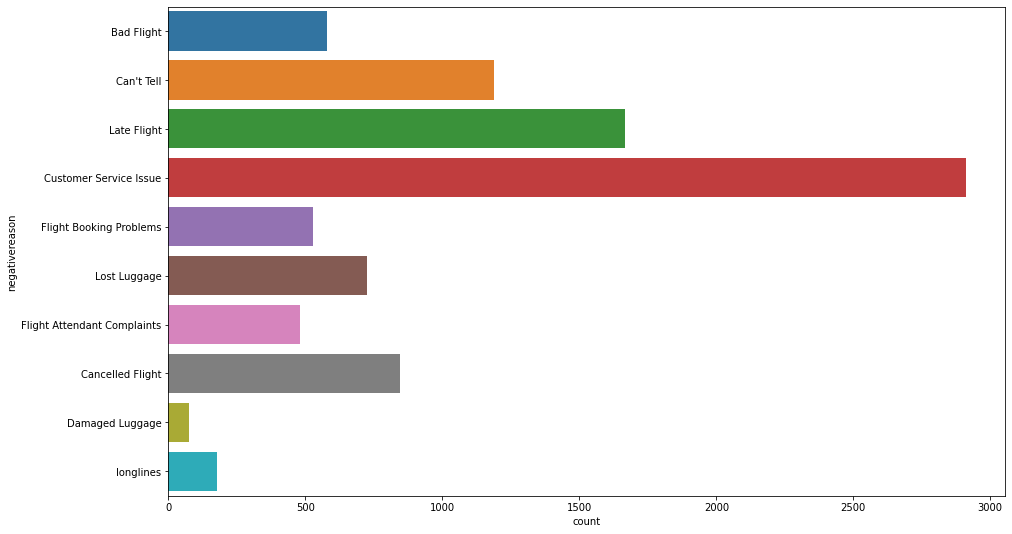

In [ ]:
plt.figure(figsize=(15, 9))
sns.countplot(y='negativereason', data = df)

In [ ]:
nr = df['negativereason'].mode()[0]

In [ ]:
df['negativereason'].fillna(nr, inplace = True)

melihat persebaran data pada kolom negative reason sesudah menghapus nan

<AxesSubplot:xlabel='count', ylabel='negativereason'>

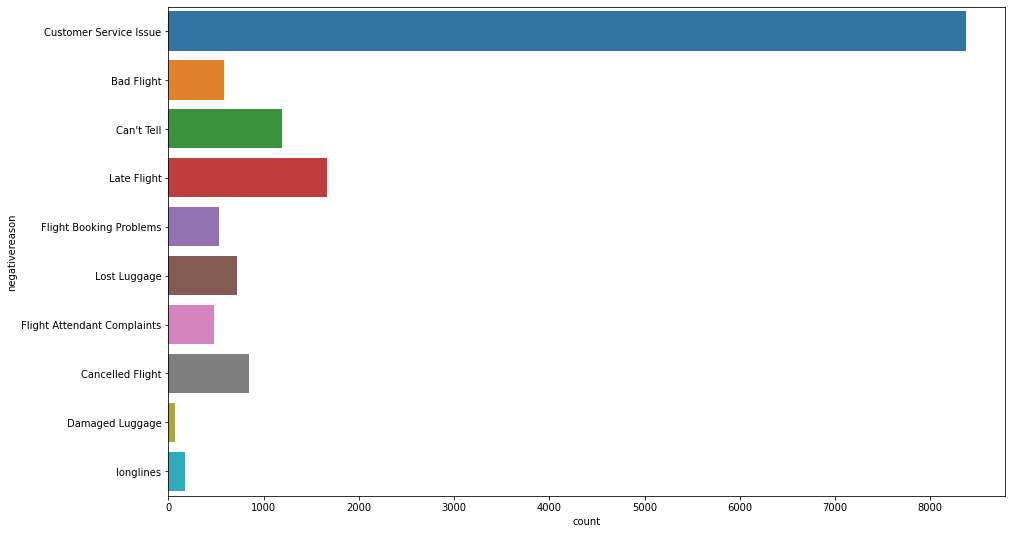

In [ ]:
plt.figure(figsize=(15, 9))
sns.countplot(y='negativereason', data = df)

In [ ]:
nc = df['negativereason_confidence'].median()

In [ ]:
df['negativereason_confidence'].fillna(nc, inplace = True)

In [ ]:
df.isnull().sum()

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                      0
negativereason_confidence           0
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64

In [ ]:
tl = df['tweet_location'].mode()[0]
df['tweet_location'].fillna(tl, inplace = True)

In [ ]:
df.isnull().sum()

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                      0
negativereason_confidence           0
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                      0
user_timezone                    4820
dtype: int64

In [ ]:
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,Customer Service Issue,0.6706,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,"Boston, MA",Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,Customer Service Issue,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,"Boston, MA",Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,Customer Service Issue,0.6706,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,"Boston, MA",Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,"Boston, MA",Pacific Time (US & Canada)


In [ ]:
df_cln = df.drop(columns = ['airline_sentiment_gold', 'negativereason_gold', 'user_timezone', 'tweet_coord'])

In [ ]:
df_cln.shape

(14640, 11)

In [ ]:
df_cln.isnull().sum()

tweet_id                        0
airline_sentiment               0
airline_sentiment_confidence    0
negativereason                  0
negativereason_confidence       0
airline                         0
name                            0
retweet_count                   0
text                            0
tweet_created                   0
tweet_location                  0
dtype: int64

In [ ]:
df_fix = df_cln[['airline_sentiment', 'negativereason', 'airline', 'text']]

df_fix.head()

,airline_sentiment,negativereason,airline,text
0,neutral,Customer Service Issue,Virgin America,@VirginAmerica What @dhepburn said.
1,positive,Customer Service Issue,Virgin America,@VirginAmerica plus you've added commercials t...
2,neutral,Customer Service Issue,Virgin America,@VirginAmerica I didn't today... Must mean I n...
3,negative,Bad Flight,Virgin America,@VirginAmerica it's really aggressive to blast...
4,negative,Can't Tell,Virgin America,@VirginAmerica and it's a really big bad thing...


Melakukan pembersihan data text dengan menggunakan library nltk stopwords


In [ ]:
df_fix['text'].values

array(['@VirginAmerica What @dhepburn said.',
       "@VirginAmerica plus you've added commercials to the experience... tacky.",
       "@VirginAmerica I didn't today... Must mean I need to take another trip!",
       ...,
       '@AmericanAir Please bring American Airlines to #BlackBerry10',
       "@AmericanAir you have my money, you change my flight, and don't answer your phones! Any other suggestions so I can make my commitment??",
       '@AmericanAir we have 8 ppl so we need 2 know how many seats are on the next flight. Plz put us on standby for 4 people on the next flight?'],
      dtype=object)

In [ ]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

Cleaned data versi 1

In [ ]:
# # stopwords = stopwords.words('english')
# # stemmer = SnowballStemmer("english")
# # tokenizer = RegexpTokenizer(r'\w+')
# # tags = r'@\w+'

# def clean_text(x):
#   text = x
#   text = text.lower()
#   text = re.sub('\[.*?\]', '', text)
#   text = re.sub(r'[^\w\s]', '', text)
#   text = re.sub('\w*\d\w*', '', text)
#   text = re.sub('\n', '', text)
#   return text

# df_fix['text'] = df_fix.text.apply(lambda x : clean_text(x))

# def new_text(sentence, stem = False):
#   sentence = [re.sub(tags, "", sentence)]
#   text = []

#   for word in sentence:
#     if word not in stopwords:
#       if stem:
#         text.append(stemmer.stem(word).lower())

#       else:
#         text.append(word.lower())
#   return tokenizer.tokenize("".join(text))

# print(f"Before cleaned: {df_fix.text[1]}")
# print()
# print(f"After cleaned: {clean_text(df_fix.text[1])}")

# df_v2 = df_fix.copy()
# # df_v1.text = df_fix.text.map(new_text)
# # df_v1['text'] = df_v1['text'].apply(lambda x : new_text(x))

Cleaned versi 2 

In [ ]:
df_v2 = df_fix.copy()

In [ ]:
def clean_text(text):
   
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text) 
    text = re.sub(r'(http|https|ftp|ssh)://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?', '', text) # Remove URl and tags
    text = re.sub('<.*?>+', '', text)
    text = re.sub(r'[^a-z0-9\s]', '', text) 
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [ ]:
# df_v2.text = df_v2.text.map(clean_text)
df_v2['text'] = df_v2['text'].apply(lambda x : clean_text(x))

In [ ]:
df_v2['text'].head(100)

0                      virginamerica what dhepburn said
1     virginamerica plus youve added commercials to ...
2     virginamerica i didnt today must mean i need t...
3     virginamerica its really aggressive to blast o...
4     virginamerica and its a really big bad thing a...
                            ...                        
95    virginamerica is it me or is your website down...
96    virginamerica i cant check in or add a bag you...
97    virginamerica  let  scanned in passengers leav...
98    virginamerica what is your phone number i cant...
99    virginamerica is anyone doing anything there t...
Name: text, Length: 100, dtype: object

In [ ]:
df_v2.head()

,airline_sentiment,negativereason,airline,text
0,neutral,Customer Service Issue,Virgin America,virginamerica what dhepburn said
1,positive,Customer Service Issue,Virgin America,virginamerica plus youve added commercials to ...
2,neutral,Customer Service Issue,Virgin America,virginamerica i didnt today must mean i need t...
3,negative,Bad Flight,Virgin America,virginamerica its really aggressive to blast o...
4,negative,Can't Tell,Virgin America,virginamerica and its a really big bad thing a...


Setelah melakukan pembersihan data dengan library nltk (stopwords) saya menghasilkan dua versi. Disini saya akan menggunakan versi yang kedua untuk di proses lebih lanjut.


**Data Visualization**

In [ ]:
df_v2['airline'].unique()
print("Total number of twt for airline\n", df_v2.groupby('airline')['airline_sentiment'].count().sort_values(ascending = False))

Total number of twt for airline
 airline
United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America     504
Name: airline_sentiment, dtype: int64


<AxesSubplot:xlabel='airline', ylabel='count'>

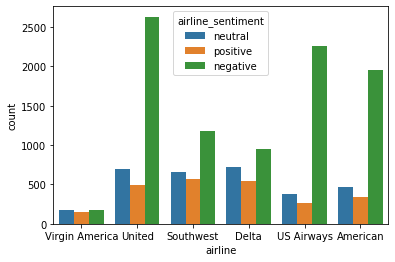

In [ ]:
sns.countplot(data = df_v2, x = 'airline', hue = 'airline_sentiment')


United sebagai negative sentiments pertama, kedua US Airways dan ketiga American. Southwest ada di urutan ke empat, disusul Delta dan Virgin America

In [ ]:
neg_rev  = df_v2[df_v2['airline_sentiment'] == 'negative']
neg_rev.shape

(9178, 4)

Melihat berapa persen review negatif dari beberapa airline / penerbangan 

In [ ]:
total = pd.DataFrame(neg_rev.groupby('airline')['airline_sentiment'].count())

total.reset_index()

,airline,airline_sentiment
0,American,1960
1,Delta,955
2,Southwest,1186
3,US Airways,2263
4,United,2633
5,Virgin America,181


In [ ]:
all_rev = pd.DataFrame(df_v2.groupby('airline')['airline_sentiment'].count())

all_rev.reset_index()

,airline,airline_sentiment
0,American,2759
1,Delta,2222
2,Southwest,2420
3,US Airways,2913
4,United,3822
5,Virgin America,504


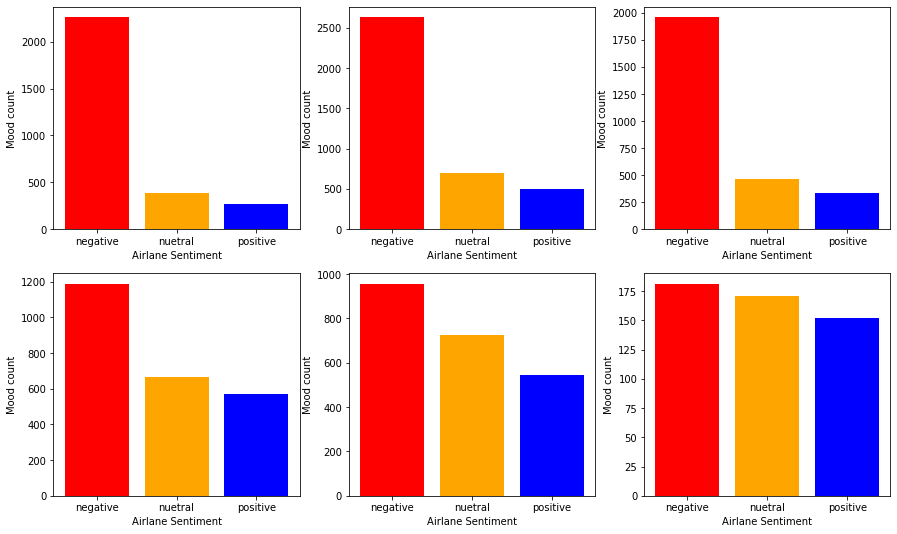

In [ ]:
airlines= ['US Airways','United','American','Southwest','Delta','Virgin America']
# airlines = df_cln['airline']
plt.figure(1,figsize=(15, 9))

for i in airlines:
    indices=airlines.index(i)
    plt.subplot(2,3,indices+1)
    new_df=df_v2[df_v2["airline"]==i]
    count=new_df['airline_sentiment'].value_counts()
    Index=[1,2,3]
    plt.bar(Index,count,color=['red','orange','blue'])
    plt.xticks(Index,['negative','nuetral','positive'])
    plt.ylabel("Mood count")
    plt.xlabel("Airlane Sentiment")

**United, US Airways, American** mendapat reaksi yang **negatif**. Sedangkan **Virgin America seimbang** 

melihat persebaran data penerbangan

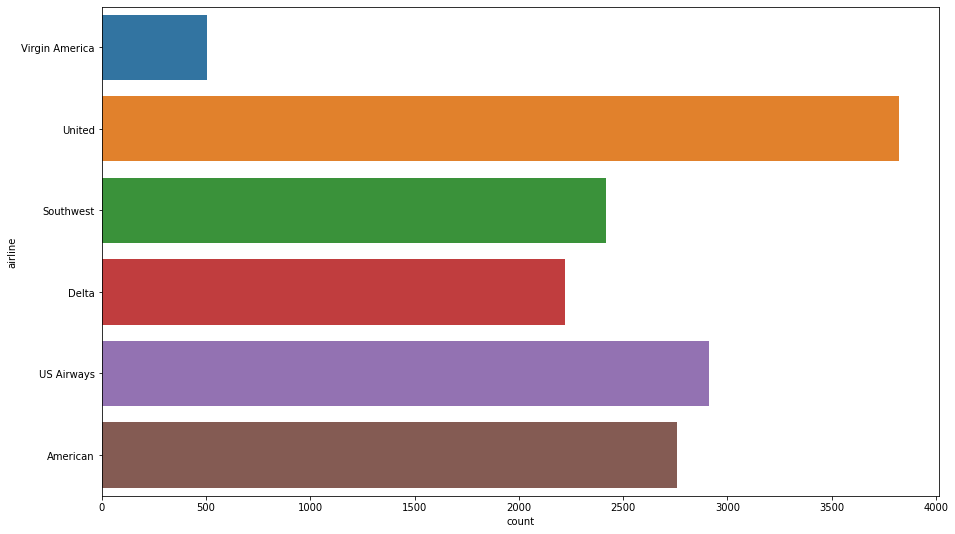

In [ ]:
plt.figure(figsize = (15, 9))
sns.countplot(y = 'airline', data=df_v2)
plt.show()

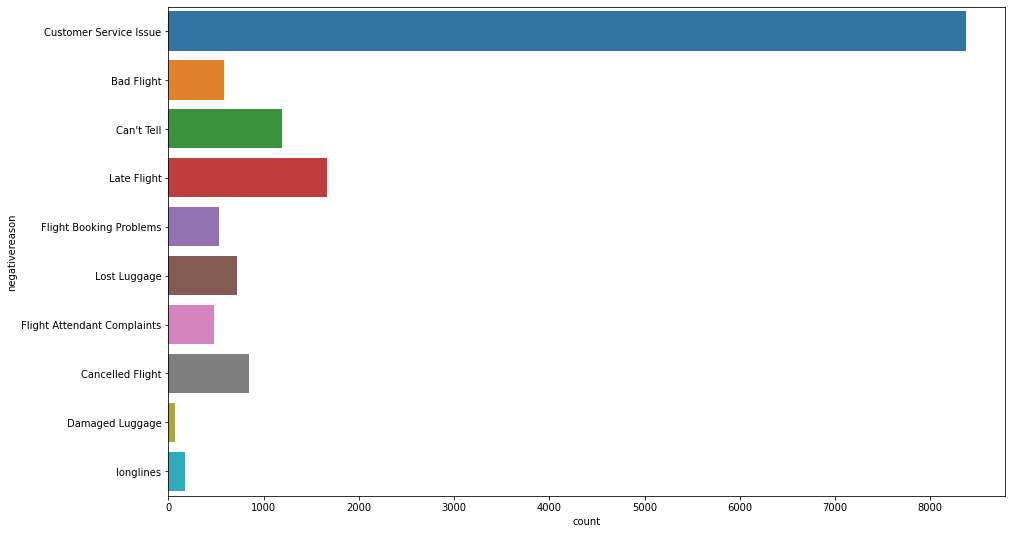

In [ ]:
plt.figure(figsize = (15, 9))
sns.countplot(y = 'negativereason', data=df_v2)
plt.show()

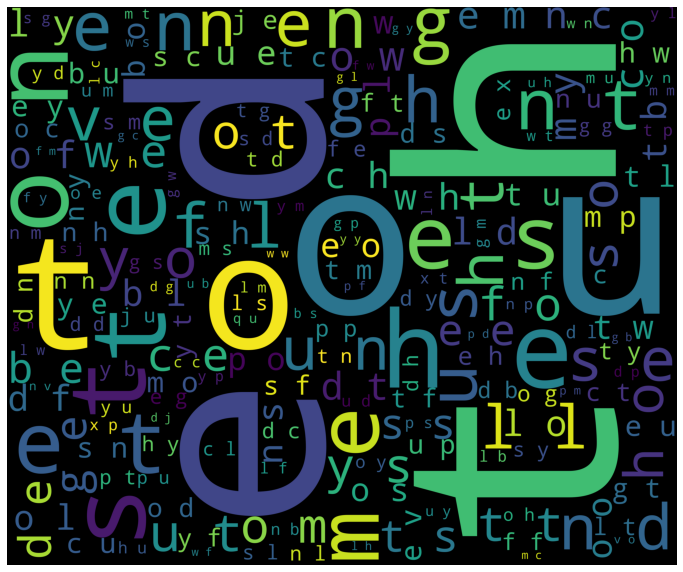

In [ ]:
new_df = df_v2[df_v2['airline_sentiment'] == 'negative']
words = ' '.join(' '.join(l) for l in new_df["text"])
cleaned_word = " ".join([word for word in words.split()
if 'http' not in word and not word.startswith('@') and word != 'RT'
])

wordcloud = WordCloud(stopwords = STOPWORDS, background_color = 'black', width = 3000, height = 2500).generate(cleaned_word)

plt.figure(1, figsize = (12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

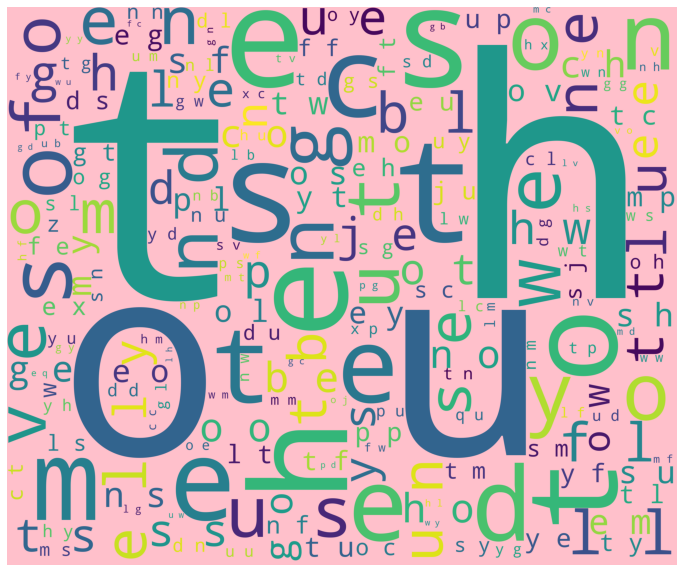

In [ ]:
new_df = df_v2[df_v2['airline_sentiment'] == 'positive']
words = ' '.join(' '.join(l) for l in new_df["text"])
cleaned_word = " ".join([word for word in words.split()
if 'http' not in word and not word.startswith('@') and word != 'RT'
])

wordcloud = WordCloud(stopwords = STOPWORDS, background_color = 'pink', width = 3000, height = 2500).generate(cleaned_word)

plt.figure(1, figsize = (12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

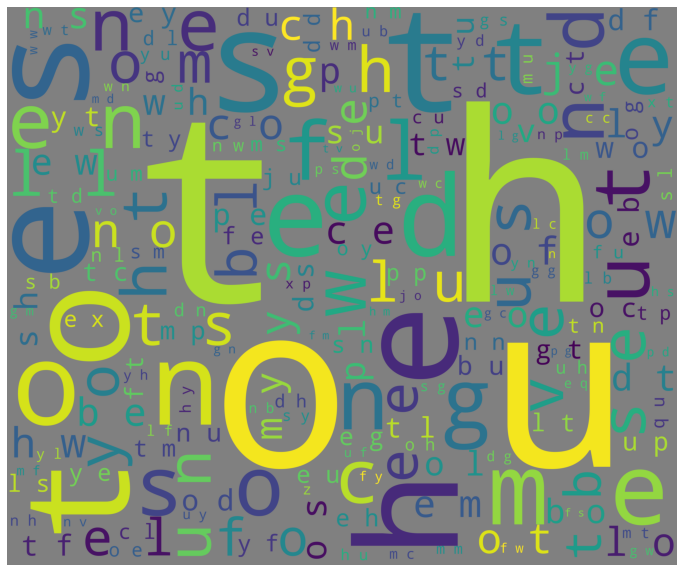

In [ ]:
new_df = df_v2[df_v2['airline_sentiment'] == 'neutral']
words = ' '.join(' '.join(l) for l in new_df["text"])
cleaned_word = " ".join([word for word in words.split()
if 'http' not in word and not word.startswith('@') and word != 'RT'
])

wordcloud = WordCloud(stopwords = STOPWORDS, background_color = 'grey', width = 3000, height = 2500).generate(cleaned_word)

plt.figure(1, figsize = (12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [ ]:
df_v2.head()

,airline_sentiment,negativereason,airline,text
0,neutral,Customer Service Issue,Virgin America,virginamerica what dhepburn said
1,positive,Customer Service Issue,Virgin America,virginamerica plus youve added commercials to ...
2,neutral,Customer Service Issue,Virgin America,virginamerica i didnt today must mean i need t...
3,negative,Bad Flight,Virgin America,virginamerica its really aggressive to blast o...
4,negative,Can't Tell,Virgin America,virginamerica and its a really big bad thing a...


In [ ]:
# -- batas percobaan 

# percobaan berhasil--

In [ ]:
df_cb = df_v2[['airline_sentiment', 'text']]
df_cb.head()

,airline_sentiment,text
0,neutral,virginamerica what dhepburn said
1,positive,virginamerica plus youve added commercials to ...
2,neutral,virginamerica i didnt today must mean i need t...
3,negative,virginamerica its really aggressive to blast o...
4,negative,virginamerica and its a really big bad thing a...


In [ ]:
num_rows = 4000
shuffled = df_cb.reindex(np.random.permutation(df_cb.index))
ng = shuffled[shuffled['airline_sentiment'] == 'negative'][:num_rows]
ps = shuffled[shuffled['airline_sentiment'] == 'positive'][:num_rows]
nt = shuffled[shuffled['airline_sentiment'] == 'neutral'][:num_rows]

combine_data = pd.concat([ng, ps, nt], ignore_index=True)
combine_data = combine_data.reindex(np.random.permutation(combine_data.index))
combine_data['label'] = 0
combine_data.head()

,airline_sentiment,text,label
3747,negative,americanair been trying to speak to agent for ...,0
176,negative,jetblue any idea what caused the delay on flig...,0
49,negative,americanair doesnt care about customers break ...,0
1698,negative,americanair yes and rebooked incorrectly,0
7635,neutral,jetblue i have the emails that they are on the...,0


In [ ]:
print(len(combine_data[combine_data['airline_sentiment']== 'neutral']))
print(len(combine_data[combine_data['airline_sentiment']== 'negative']))
print(len(combine_data[combine_data['airline_sentiment']== 'positive']))

3099
4000
2363


In [ ]:
df_pc = combine_data.copy()
df_pc.loc[df_pc['airline_sentiment'] == 'neutral', 'label'] = 0
df_pc.loc[df_pc['airline_sentiment'] == 'negative', 'label'] = 1
df_pc.loc[df_pc['airline_sentiment'] == 'positive', 'label'] = 2

In [ ]:
df_pc.head()

,airline_sentiment,text,label
3747,negative,americanair been trying to speak to agent for ...,1
176,negative,jetblue any idea what caused the delay on flig...,1
49,negative,americanair doesnt care about customers break ...,1
1698,negative,americanair yes and rebooked incorrectly,1
7635,neutral,jetblue i have the emails that they are on the...,0


In [ ]:
from keras.utils import to_categorical
labels = to_categorical(df_pc['label'], num_classes=3)
labels.shape

(9462, 3)

In [ ]:
max_features = 3000
max_len = 130

token = Tokenizer(num_words = max_features)
token.fit_on_texts(df_pc['text'].values)
seq = token.texts_to_sequences(df_pc['text'].values)
X = pad_sequences(seq, maxlen = max_len)


In [ ]:
word_index = token.word_index
print('Found %s unique tokens' % len(word_index))

Found 10109 unique tokens


In [ ]:
y = labels

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)

In [ ]:
embedd_dim = 128
lstm_out = 96

pc_model = Sequential()
pc_model.add(Embedding(max_features, embedd_dim, input_length = X.shape[1]))
pc_model.add(SpatialDropout1D(0.7))
pc_model.add(LSTM(64, dropout=0.7, recurrent_dropout=0.7))
pc_model.add(Dense(3, activation= 'softmax'))
pc_model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
pc_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 130, 128)          384000    
                                                                 
 spatial_dropout1d (SpatialD  (None, 130, 128)         0         
 ropout1D)                                                       
                                                                 
 lstm (LSTM)                 (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 3)                 195       
                                                                 
Total params: 433,603
Trainable params: 433,603
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from keras.callbacks import EarlyStopping

batch_size = 50
history = pc_model.fit(X_train, y_train, epochs = 20, batch_size=batch_size, validation_split=0.2, callbacks =[EarlyStopping(monitor='val_loss', patience = 7, min_delta=0.0001)])

Epoch 1/20
114/114 [==============================] - 90s 721ms/step - loss: 1.0075 - accuracy: 0.5025 - val_loss: 0.9149 - val_accuracy: 0.5577
Epoch 2/20
114/114 [==============================] - 75s 662ms/step - loss: 0.8668 - accuracy: 0.6041 - val_loss: 0.7706 - val_accuracy: 0.6592
Epoch 3/20
114/114 [==============================] - 72s 632ms/step - loss: 0.7408 - accuracy: 0.6832 - val_loss: 0.6782 - val_accuracy: 0.7183
Epoch 4/20
114/114 [==============================] - 75s 656ms/step - loss: 0.6743 - accuracy: 0.7209 - val_loss: 0.6449 - val_accuracy: 0.7317
Epoch 5/20
114/114 [==============================] - 72s 628ms/step - loss: 0.6137 - accuracy: 0.7539 - val_loss: 0.6366 - val_accuracy: 0.7345
Epoch 6/20
114/114 [==============================] - 73s 640ms/step - loss: 0.5832 - accuracy: 0.7676 - val_loss: 0.6288 - val_accuracy: 0.7423
Epoch 7/20
114/114 [==============================] - 72s 631ms/step - loss: 0.5533 - accuracy: 0.7782 - val_loss: 0.6167 - val_ac

In [ ]:
model_loss = pd.DataFrame(pc_model.history.history)
model_loss.head()

,loss,accuracy,val_loss,val_accuracy
0,1.007463,0.502466,0.914925,0.557746
1,0.866846,0.604123,0.770605,0.659155
2,0.740793,0.683228,0.678177,0.718310
3,0.674346,0.720930,0.644934,0.731690
4,0.613705,0.753876,0.636565,0.734507


<AxesSubplot:>

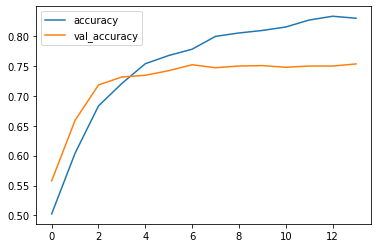

In [ ]:
model_loss[['accuracy','val_accuracy']].plot()

<AxesSubplot:>

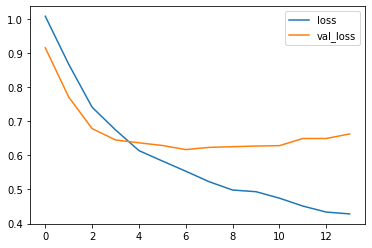

In [ ]:
model_loss[['loss', 'val_loss']].plot()

In [ ]:
loss, accuracy = pc_model.evaluate(X_test, y_test)
print("loss", loss)
print("accuracy", accuracy)

74/74 [==============================] - 3s 44ms/step - loss: 0.6751 - accuracy: 0.7451
loss 0.6750804781913757
accuracy 0.745139479637146


In [ ]:
# text = ['plus youve added commercials'] # positive
# text = ['The flight with this airline was average. The staff was courteous and professional, the plane was clean, and the flight arrived on time. The seats were a bit cramped, but that is to be expected on a budget airline. Overall, it was an okay experience'] # neutral
text = ['i had a terrible experience flying with this airline.  The customer service was appalling, the flight was delayed multiple times without any explanation, and the seats were uncomfortable and cramped'] # negative
text = token.texts_to_sequences(text)
text = pad_sequences(text, maxlen=max_len, dtype = 'int32')
res = pc_model.predict(text, batch_size = 1, verbose= 2)
res

1/1 - 0s - 362ms/epoch - 362ms/step


array([[0.00490224, 0.9934957 , 0.00160202]], dtype=float32)

In [ ]:
if np.argmax(res) == 0:
  print("neutral comment")
elif np.argmax(res) == 1:
  print("negative comment")
elif np.argmax(res) == 2:
  print("positive comment")
  

negative comment


In [ ]:
# saving model in pickle 
import pickle

pickle_out = open('nlp_model.pkl', mode= 'wb') 
pickle.dump(pc_model, pickle_out)
pickle_out.close()

Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers
......dense
.........vars
............0
............1
......embedding
.........vars
............0
......lstm
.........cell
............vars
...............0
...............1
...............2
.........vars
......spatial_dropout1d
.........vars
...metrics
......mean
.........vars
............0
............1
......mean_metric_wrapper
.........vars
............0
............1
...optimizer
......vars
.........0
.........1
.........10
.........11
.........12
.........2
.........3
.........4
.........5
.........6
.........7
.........8
.........9
...vars
Keras model archive saving:
File Name                                             Modified             Size
variables.h5                                   2023-03-06 13:30:16      5230568
metadata.json                                  2023-03-06 13:30:16           64
config.json                                    2023-03-06 13:30:16         2372


In [ ]:
!pip install streamlit
!pip install nltk
!pip install pyngrok
!pip install spacy

!python -m textblob.download_corpora
!python -m spacy download en_core_web_sm

import streamlit as st
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from pyngrok import ngrok

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 79.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 164.8/164.8 KB 23.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.6/80.6 KB 12.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 97.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 KB 23.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 238.7/238.7 KB 30.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 KB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 64.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.5/84.5 KB 10.1 MB/s eta 0:00:00
  Created wheel for validators: filename=validators-0.20.0-py3-none-any.whl size=19581 sha256=d71389ba1ec8959b8dee46537a9ff319093821cdabb

In [ ]:
import spacy
nlp = spacy.load('en_core_web_sm')

In [ ]:
# def prediction(Positive, Neutral, Negative):
#     prediction = nlp_m.predict([[Positive, Neutral, Negative]])
    
#     st.title("Sentiment Analysis")
#     text = st.text_input("Enter text to analyze")

#     if st.button("Predict"):
#         text_vectorized = vectorizer.transform([text])
#         prediction = nb_classifier.predict(text_vectorized)
        
#         if prediction == "positive":
#             st.success("The sentiment is positive")
#         elif prediction == "neutral":
#             st.warning("The sentiment is neutral")
#         else:
#             st.error("The sentiment is negative")

 
#         message = st.text_area("Enter Text","Type Here ...")
#         if st.button("Submit"):
#             blob = TextBlob(message)
#             result_sentiment = blob.sentiment
#             st.success(result_sentiment)

In [ ]:
%%writefile app_streamlit.py

# import libraries
import pickle
import streamlit as st 
import os 
import spacy
# from gensim.summarization import summarize
sp = spacy.load('en_core_web_sm')
from spacy import displacy
 
# loading trained model
path_model = './nlp_model.pkl'
pickle_in = open(path_model, 'rb')
nlp_m = pickle.load(pickle_in)

HTML_WRAPPER = """<div style="overflow-x: auto; border: 1px solid #e6e9ef; border-radius: 0.25rem; padding: 1rem">{}</div>"""

def main():

    # Title
    st.markdown("<h1 style='text-align: center; color: white;'>Natural Language Processing App</h1>", unsafe_allow_html=True)
 
    # Sentiment Analysis
    st.title("Twitter US Airline Analysis")
    # text = st.text_input("Enter text to analyze and get the predict sentiment")

    input_txt = st.text_input("Input text here: ")

    # def pred_sentiment(text):
    if st.button("Predict"):
      # text_vectorized = vectorizer.transform([text])
      prediction = nlp_m.predict([input_txt])[0]
      if prediction == 0:
        st.warning("The sentiment is Neutral")
      elif prediction == 1:
        st.error("The sentiment is Negative")
      else:
        st.success("The sentiment is Positive")

if __name__ == '__main__':
  main()

Writing app_streamlit.py


In [ ]:
# import locale
# locale.setlocale(locale.LC_ALL, 'en_US.UTF-8')

In [ ]:
# !export LC_ALL=en_US.UTF-8
# !export LANG=en_US.UTF-8
# !export LANGUAGE=en_US.UTF-8

# import locale
# def getpreferredencoding(do_setlocale = True):
#     return "UTF-8"
# locale.getpreferredencoding = getpreferredencoding

In [ ]:
!ls

In [ ]:
!ngrok

In [ ]:
!ngrok authtoken 2MRHaB2ELL5eE9zmJ8TbngKGBsP_3LBJsAsgS7XzkH7idawvh

Authtoken saved to configuration file: /root/.ngrok2/ngrok.yml


In [ ]:
# public_url = ngrok.connect(port='80')
# print(public_url)

!nohup streamlit run app_streamlit.py --server.port 80 & 
url = ngrok.connect(port = '80')
print(url)


nohup: appending output to 'nohup.out'


INFO:pyngrok.ngrok:Opening tunnel named: http-80-3748a71b-628a-43a3-b2c3-d3fa054e1a24
2023-03-06 13:32:34.755 INFO    pyngrok.ngrok: Opening tunnel named: http-80-3748a71b-628a-43a3-b2c3-d3fa054e1a24
INFO:pyngrok.process.ngrok:t=2023-03-06T13:32:34+0000 lvl=info msg="no configuration paths supplied"
2023-03-06 13:32:34.841 INFO    pyngrok.process.ngrok: t=2023-03-06T13:32:34+0000 lvl=info msg="no configuration paths supplied"
INFO:pyngrok.process.ngrok:t=2023-03-06T13:32:34+0000 lvl=info msg="using configuration at default config path" path=/root/.ngrok2/ngrok.yml
2023-03-06 13:32:34.846 INFO    pyngrok.process.ngrok: t=2023-03-06T13:32:34+0000 lvl=info msg="using configuration at default config path" path=/root/.ngrok2/ngrok.yml
INFO:pyngrok.process.ngrok:t=2023-03-06T13:32:34+0000 lvl=info msg="open config file" path=/root/.ngrok2/ngrok.yml err=nil
2023-03-06 13:32:34.854 INFO    pyngrok.process.ngrok: t=2023-03-06T13:32:34+0000 lvl=info msg="open config file" path=/root/.ngrok2/ngro

NgrokTunnel: "http://79bd-35-204-240-106.ngrok.io" -> "http://localhost:80"


In [ ]:
# !streamlit run app_streaml  it.py&>/dev/null&

In [ ]:
# pub_url = ngrok.connect(port = 80)

In [ ]:
# from pyngrok import ngrok

# tunnels = ngrok.get_tunnels()
# tunnels


In [ ]:
# -- batas percobaan

# percobaan berhasil --

In [ ]:
# df_enc = df_v2.copy()
# df.airline_sentiment.value_counts()

# enc = {
#     'negative': 0,
#     'neutral' : 1,
#     'positive' : 2
# }
# df_enc  = df_enc.replace({'airline_sentiment' : enc})

# print(len(df_v2[df_v2['airline_sentiment']== 'neutral']))
# print(len(df_v2[df_v2['airline_sentiment']== 'negative']))
# print(len(df_v2[df_v2['airline_sentiment']== 'positive']))

# df_v2.loc[df_v2['airline_sentiment'] == 'neutral', 'label'] = 0
# df_v2.loc[df_v2['airline_sentiment'] == 'negative', 'label'] = 1
# df_v2.loc[df_v2['airline_sentiment'] == 'positive', 'label'] = 2

# df_v2.head(10)
# df_v2['label'] = df_v2['label'].astype(int)

# from keras.utils import to_categorical
# labels = to_categorical(df_v2['label'], num_classes = 3)

# max_features = 4000
# max_len = 130

# token = Tokenizer(num_words = max_features)
# token.fit_on_texts(df_v2['text'].values)
# seq = token.texts_to_sequences(df_v2['text'].values)
# X = pad_sequences(seq, maxlen = max_len)

# wo_idx = token.word_index
# print('Found %s unique tokens.' % len(wo_idx))

# y = labels

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=  0.25, random_state=42)

# embed_dim = 128
# lstm_out = 96

# model  = Sequential()
# model.add(Embedding(max_features, embed_dim, input_length = X.shape[1]))
# model.add(LSTM(64, dropout=0.7, recurrent_dropout=0.7))
# # model.add(MaxPooling1D(pool_size=2))
# # model.add(Flatten())
# model.add(Dense(10, activation ='relu'))
# model.add(Dense(3, activation ='softmax'))

# model.compile(optimizer ='adam', loss ='categorical_crossentropy', metrics =['accuracy'])
# print(model.summary())

# from keras.callbacks import EarlyStopping

# batch_size = 50
# history = model.fit(X_train, y_train, epochs = 20, batch_size=batch_size, validation_split=0.2, callbacks =[EarlyStopping(monitor='val_loss', patience = 7, min_delta=0.0001)])


# model_loss = pd.DataFrame(model.history.history)
# model_loss.head(11)